<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
</center>
<center>Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center> Capstone проект №1. Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [185]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pprint, pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = ('/home/truename/Documents/capstone_user_identification')

In [187]:
pkl_file = open(os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'), 'rb')

data1 = pickle.load(pkl_file)
pprint.pprint(data1)
pkl_file.close()

{'accounts.google.com': (8, 1),
 'apis.google.com': (9, 1),
 'football.kulichki.ru': (6, 2),
 'geo.mozilla.org': (11, 1),
 'google.com': (1, 9),
 'mail.google.com': (5, 2),
 'meduza.io': (3, 3),
 'oracle.com': (2, 8),
 'plus.google.com': (7, 1),
 'vk.com': (4, 3),
 'yandex.ru': (10, 1)}


In [262]:
#10214//7# + (1 if 10214%7 > 0 else 0)
7600//5

1520

In [267]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    #csvfiles = glob.glob(path_to_csv_files, recursive=True)
    #path_to_csv_files = os.path.join(PATH_TO_DATA, '3users')
    #session_length = 10
    csvfiles = sorted([os.path.join(dirpath, f)
    for dirpath, dirnames, files in os.walk(path_to_csv_files)
    for f in files if f.endswith('.csv')])
    dict_sites={}
    site_id=1
    user_id=1
    cols = ['site%d' % (sess_id,) for sess_id in range(1,session_length+1)]+['user_id']
    df=pd.DataFrame(columns=cols)
    for f in csvfiles:
        fcsv = pd.read_csv(f,',',header=0)
        sess_id = 1
        #print(fcsv.shape[0])
        numRows = fcsv.shape[0]//window_size + (1 if fcsv.shape[0]%window_size > 0 else 0)
        #print(numRows)
        df_file = pd.DataFrame(index=range(numRows), columns=cols)
        i = 0
        sess_id = 1
        row = 0
        while (i < fcsv.shape[0]) & ((row+1)*window_size <= fcsv.shape[0]):
            #print(user_id,i,row,sess_id-1,row*window_size,fcsv.loc[i,"site"],fcsv.shape[0],(row+1)*window_size,numRows)
            #1 7599 1519 4 7595 ws.mediapostcommunication.net 7600 7600 1521
            df_file.iloc[row,(sess_id-1)] = fcsv.loc[i,"site"]
            if fcsv.loc[i,"site"] in dict_sites:
                dict_sites[fcsv.loc[i,"site"]] = (dict_sites[fcsv.loc[i,"site"]][0],dict_sites[fcsv.loc[i,"site"]][1]+1)
            else:
                dict_sites[fcsv.loc[i,"site"]] = (site_id,1)
                site_id+=1
            if (sess_id%session_length == 0) | ((i==fcsv.shape[0]-1) & (sess_id >= window_size)):
                if fcsv.shape[0]-1 >= (row+1)*window_size:
                    i = (row+1)*window_size
                else:
                    i -= (session_length - window_size) -1
                sess_id = 1
                row += 1
            else:
                i += 1
                sess_id += 1
        df_file['user_id'] = user_id
        df = df.append(df_file, ignore_index = True)
        user_id+=1
    #print(dict_sites)
    #dict_sites=sorted(dict_sites.items(), key=lambda x: x[1][1], reverse=True)
    #site_id=1
    #d=[]
    #for i in dict_sites:
    #    d.append(site_id,i[1][1])
    #    site_id+=1
    #df.fillna(0, inplace=True)
    #print(df)
    #for i in d:
    #    df.replace(i, d[i][0], inplace=True)
    #print(df)
    #df_names=[]
    #for i in range(1,session_length+1):
    #    df_names.append('site%d' % (i,))
    #df_names.append('user_id')
    #df = df[df_names]
    
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    X = df.iloc[:, :-1].values
    for d in X:
        for term in d:
            index = vocabulary.setdefault(term, len(vocabulary))
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    X_sparse = csr_matrix((data, indices, indptr), dtype=int)[:,1:]
    
    return X_sparse, df.iloc[:, -1].values

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [256]:
%%time
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 29 ms


In [268]:
%%time
X_toy_s15_w5, y_s15_w5 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'10users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_10users.pkl'),
                                       session_length=15, window_size=5)

CPU times: user 1min 51s, sys: 0 ns, total: 1min 51s
Wall time: 1min 51s


In [236]:
#my
X_toy_s5_w3.todense()

matrix([[3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0],
        [2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1],
        [1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0],
        [1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0]])

In [237]:
#my
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3], dtype=object)

In [8]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [269]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            print(num_users,window_size,session_length)
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,str(num_users)+'users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_'+str(num_users)+'users.pkl'),
                                       session_length=session_length, window_size=window_size)
            with open(os.path.join(PATH_TO_DATA, 'X_sparse_'+str(num_users)+'users_s'+str(session_length)+'_w'+str(window_size)+'.pkl'), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, 'y_'+str(num_users)+'users_s'+str(session_length)+'_w'+str(window_size)+'.pkl'), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)
            data_lengths.append(X_sparse.shape[0])

10 10 15
10 7 15
10 7 10
10 7 7
10 5 15
10 5 10
10 5 7
10 5 5
150 10 15
150 7 15
150 7 10
150 7 7
150 5 15
150 5 10
150 5 7
150 5 5
CPU times: user 1h 33min 14s, sys: 0 ns, total: 1h 33min 14s
Wall time: 1h 33min 15s


**Запишите в файл *answer2_1.txt* все числа из списка *data_lengths* через пробел. Полученный файл будет ответом на 1 вопрос теста.**

In [270]:
def write_answer_to_file(answer, file_address):
    with open(file_address, 'w') as out_f:
        out_f.write(str(answer))

In [292]:
write_answer_to_file(' '.join([str(x) for x in data_lengths]), 
                     'answer2_1.txt')

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [293]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [294]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,192,586,134,3,134,134,3,134,204,134,1
1,416,193,683,256,134,31,393,3515,217,55,1
2,55,3,55,55,5,293,416,337,918,55,1
3,483,3734,483,55,55,55,55,982,201,123,1
4,349,55,5,4459,259,212,4217,2422,684,2422,1


In [11]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,193,574,133,3,133,133,3,133,203,133,31
1,415,192,675,254,133,31,393,3634,217,55,31
2,55,3,55,55,5,293,415,333,900,55,31
3,473,3395,473,55,55,55,55,944,199,123,31
4,342,55,5,3458,258,211,3369,2096,674,2096,31


In [295]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


In [296]:
train_df['user_id'].value_counts()

7     2796
3     2204
8     1868
6     1712
9     1643
2     1022
4      802
1      760
5      720
10     534
Name: user_id, dtype: int64

**Распределение целевого класса:**

In [13]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [297]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [298]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

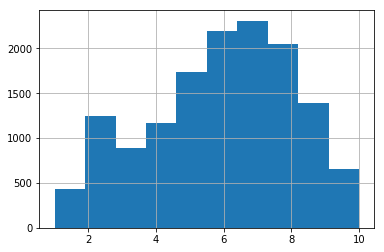

In [299]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально. Сделайте вывод. Ответом на второй вопрос в тесте будет файл со словом "YES" или "NO" в зависимости от того, распределено ли нормально число уникальных сайтов в сессии.**

In [300]:
import scipy
from statsmodels.stats.weightstats import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


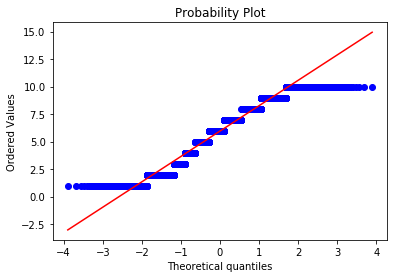

In [308]:
stats.probplot(pd.Series(num_unique_sites), dist = "norm", plot = pylab)
pylab.show()

In [310]:
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(pd.Series(num_unique_sites)))

Shapiro-Wilk normality test, W-statistic: 0.954693, p-value: 0.000000


In [335]:
write_answer_to_file('NO', 
                     'answer2_2.txt')

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

In [312]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [316]:
len(has_two_similar),sum(has_two_similar)

(14061, 13410)

In [326]:
pi_val = stats.binom_test(13410, 14061, 0.95, alternative = 'greater')
print('%.10f'%pi_val)

0.0220765377


In [327]:
write_answer_to_file(pi_val, 
                     'answer2_3.txt')

**Постройте для этой доли 95% доверительный интервал Уилсона. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_4.txt*. Это будет ответом на 4 вопрос теста.**

In [328]:
wilson_interval = proportion_confint(sum(has_two_similar), len(has_two_similar), method = 'wilson')

In [329]:
write_answer_to_file('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)), 
                     'answer2_4.txt')

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [330]:
#site_freqs = 
#[np.unique(train_df.values[i, :-1]).shape[0] for i in range(train_df.shape[0])]
train_df

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,192,586,134,3,134,134,3,134,204,134,1
1,416,193,683,256,134,31,393,3515,217,55,1
2,55,3,55,55,5,293,416,337,918,55,1
3,483,3734,483,55,55,55,55,982,201,123,1
4,349,55,5,4459,259,212,4217,2422,684,2422,1
5,227,684,212,212,55,55,128,173,3382,4401,1
6,358,586,134,3,134,31,134,393,192,134,1
7,262,4415,1672,393,55,3,55,3,201,123,1
8,55,337,106,204,1255,524,55,837,106,5,1


In [ ]:
pd.Series(site_freqs).hist();

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

In [331]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [332]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [345]:
freq = pd.Series(num_unique_sites).values
#print(len(freq))
freq_scores = map(np.median, get_bootstrap_samples(freq, 1000))
a,b = stat_intervals(freq_scores, 0.05)

In [347]:
write_answer_to_file('{} {}'.format(a,b), 
                                    'answer2_5.txt')

## Пути улучшения
В этом проекте свобода творчества на каждом шаге, а 7 неделя проекта посвящена общему описанию (`html`, `ipynb` или `pdf`) и взаимному оцениванию проектов. Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.